<a href="https://colab.research.google.com/github/Aaryan23iitk/AME_Smart_Maintenance/blob/main/230023_Assignment_Smart_Maintenance_Aaryan_Tiwari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions for the assignment



*   Fill the codeblocks according to the comments given
*   Hints are given wherever required

*   Please note that copying will not be tolerated, and appropriate action will be taken if we suspect any misconduct.





By - Aaryan Tiwari 230023


In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [2]:
# import the dataset and necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L1, L2

# display the information about the dataset
data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [3]:
# count the unique values in and remove dupicates
print(data.nunique())
data = data.drop_duplicates()

footfall       99
tempMode        8
AQ              7
USS             7
CS              7
VOC             7
RP             71
IP              7
Temperature    24
fail            2
dtype: int64


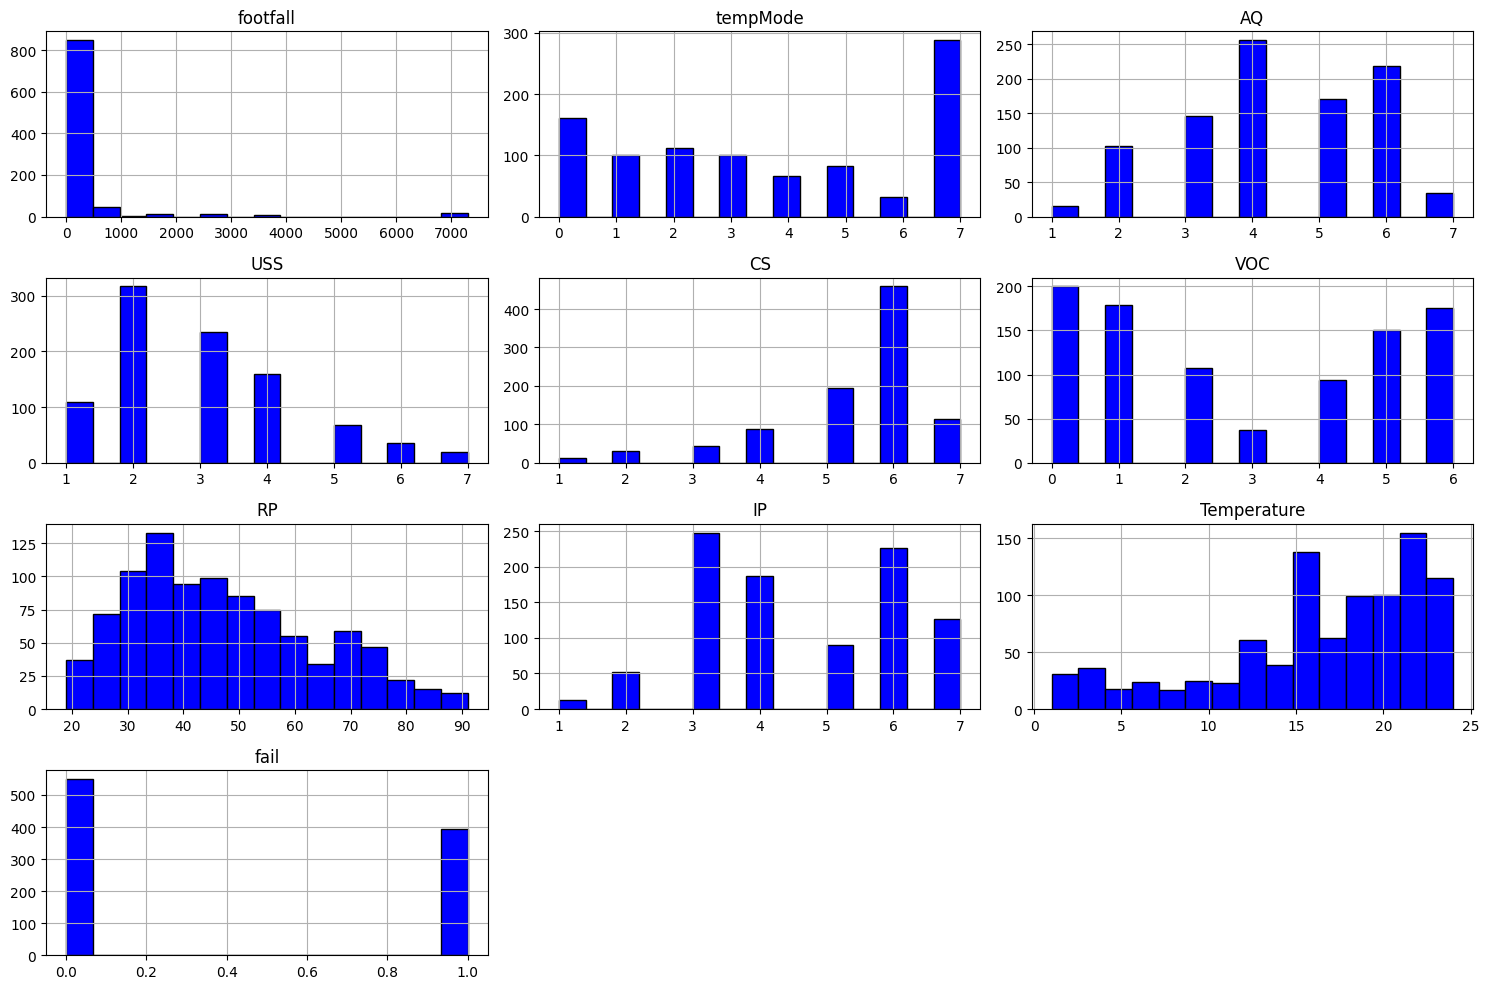

In [4]:
# Plot the Histograms for each column in the dataset
data.hist(bins=15, figsize=(15, 10), color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

In [5]:
# Display the names of the column
print(data.columns.tolist())

['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature', 'fail']


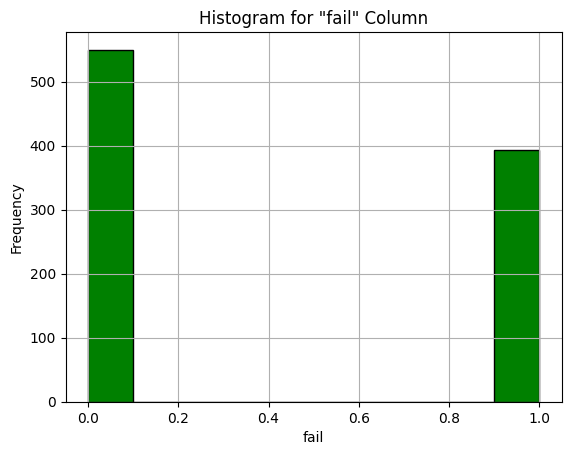

In [6]:
# Plot the histogram for the 'fail' column
data['fail'].hist(bins=10, color='green', edgecolor='black')
plt.title('Histogram for "fail" Column')
plt.xlabel('fail')
plt.ylabel('Frequency')
plt.show()



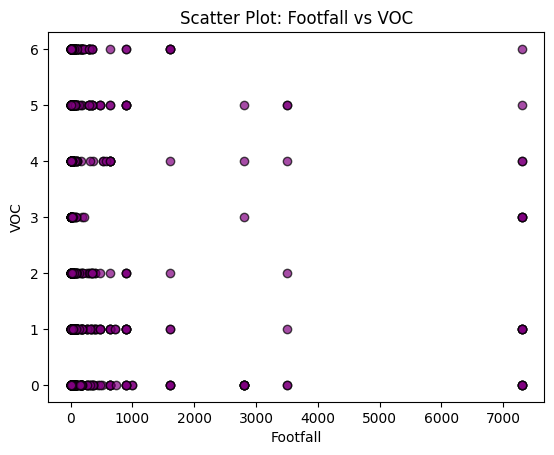

In [7]:
# Create a scatter plot to visualize the relationship between 'footfall' and 'VOC'
plt.scatter(data['footfall'], data['VOC'], alpha=0.7, color='purple', edgecolor='k')
plt.title('Scatter Plot: Footfall vs VOC')
plt.xlabel('Footfall')
plt.ylabel('VOC')
plt.show()

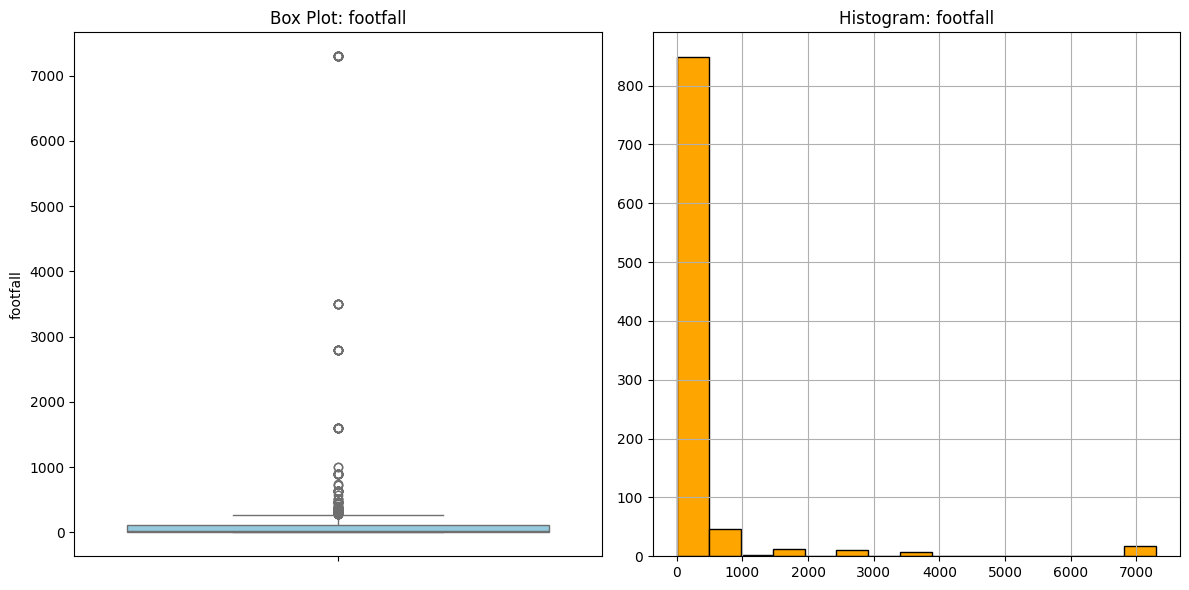

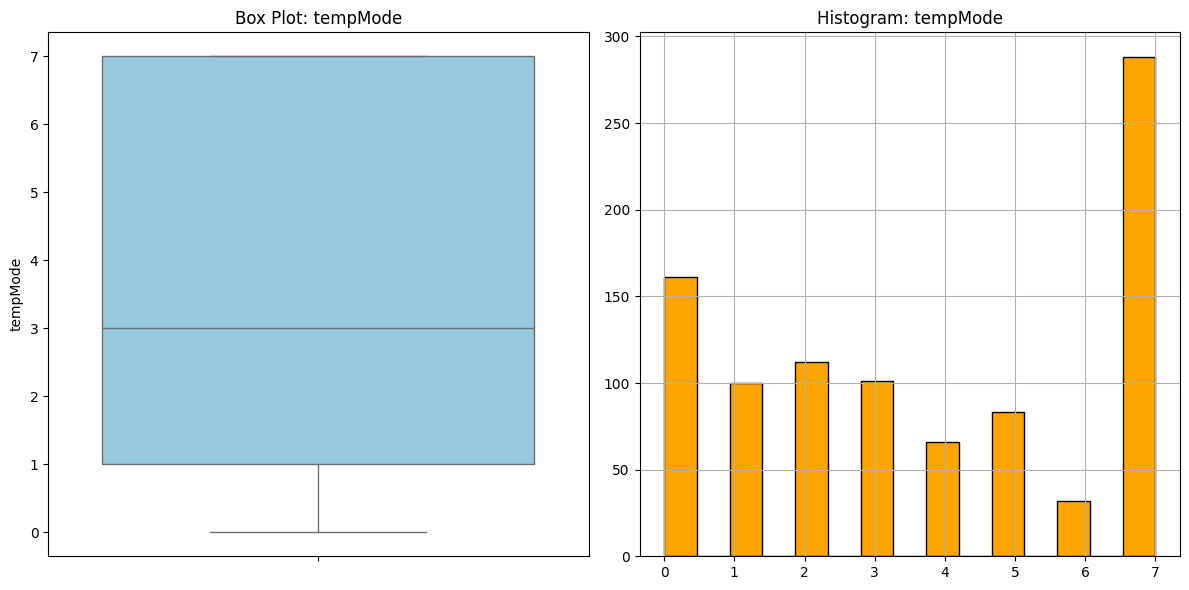

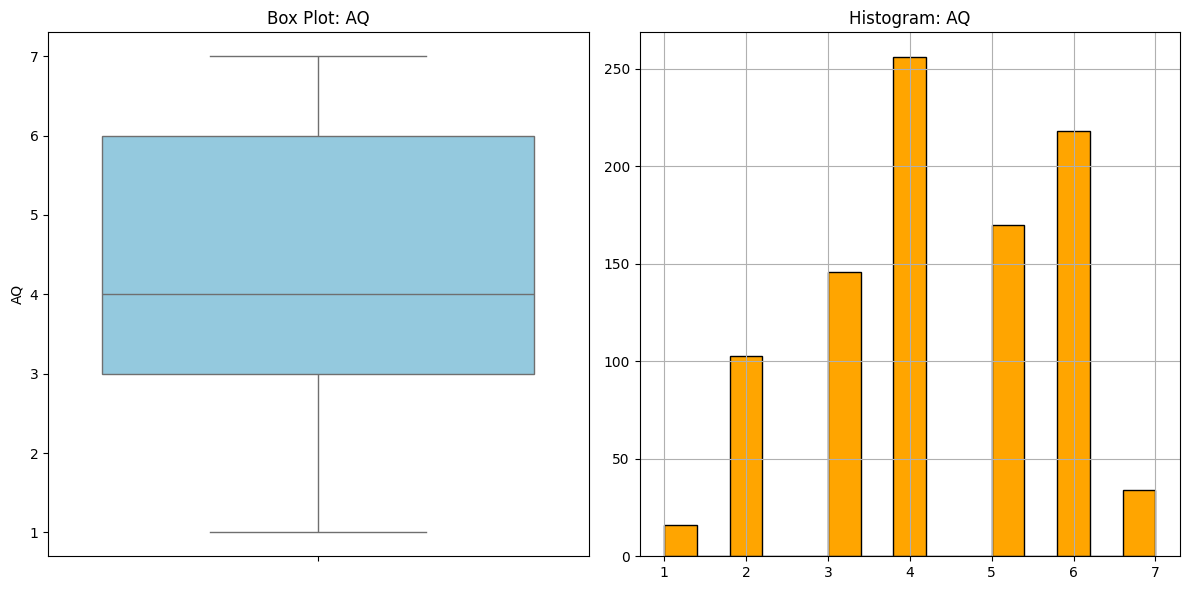

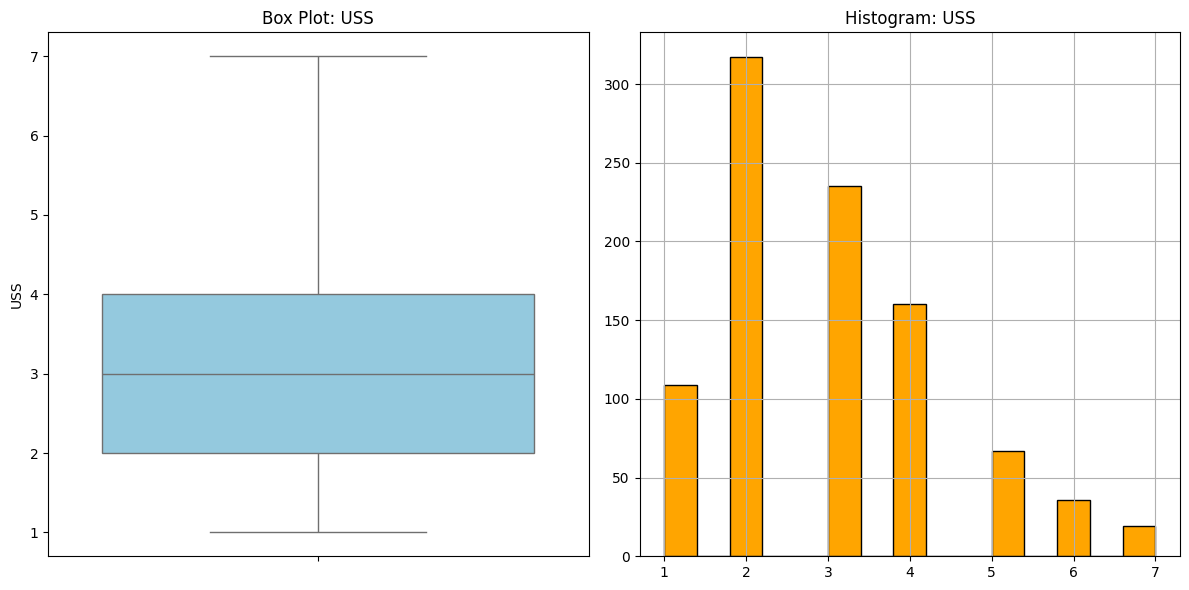

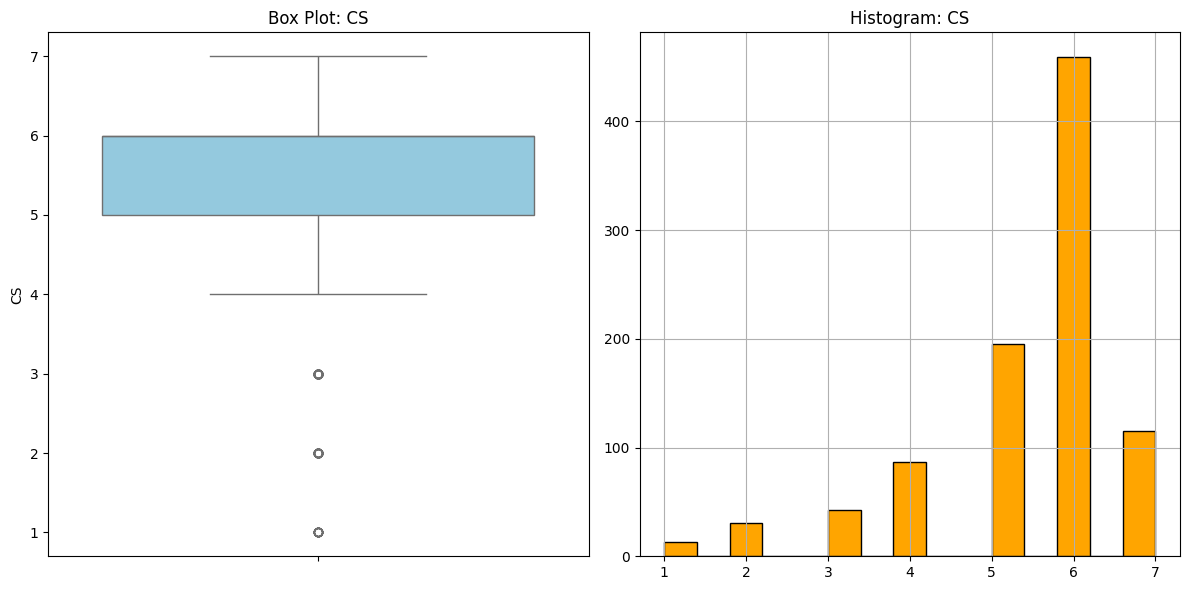

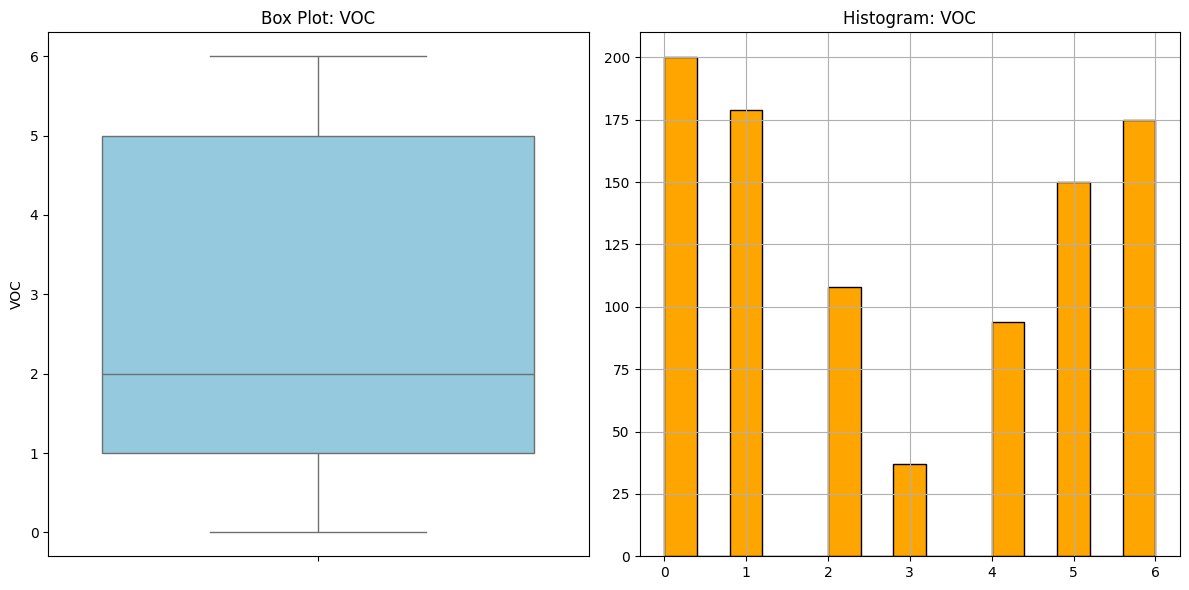

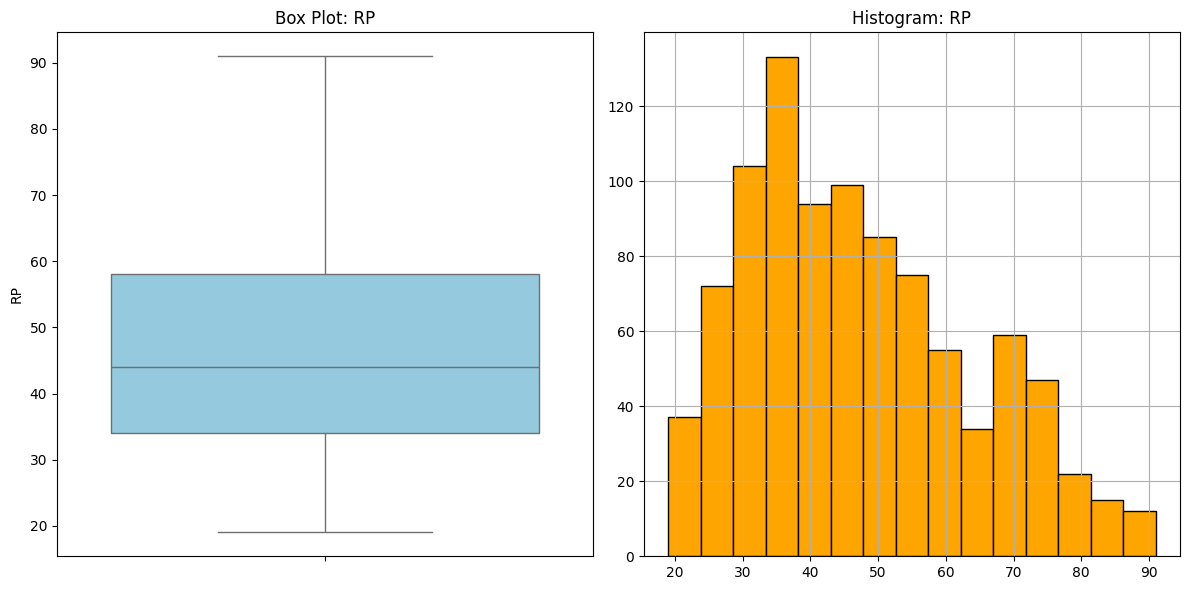

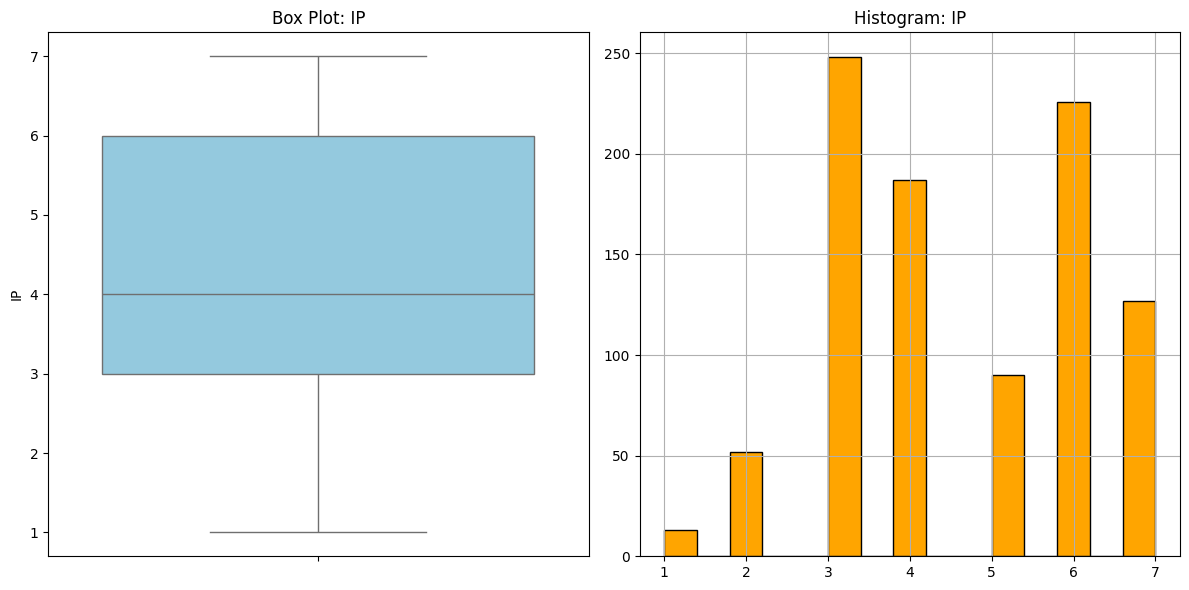

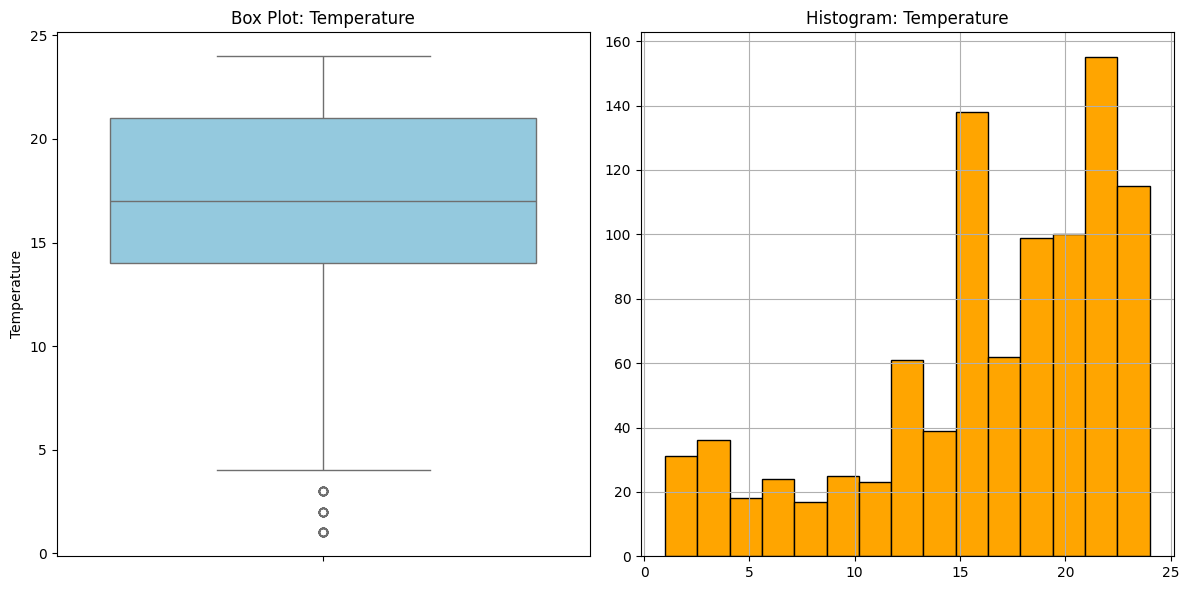

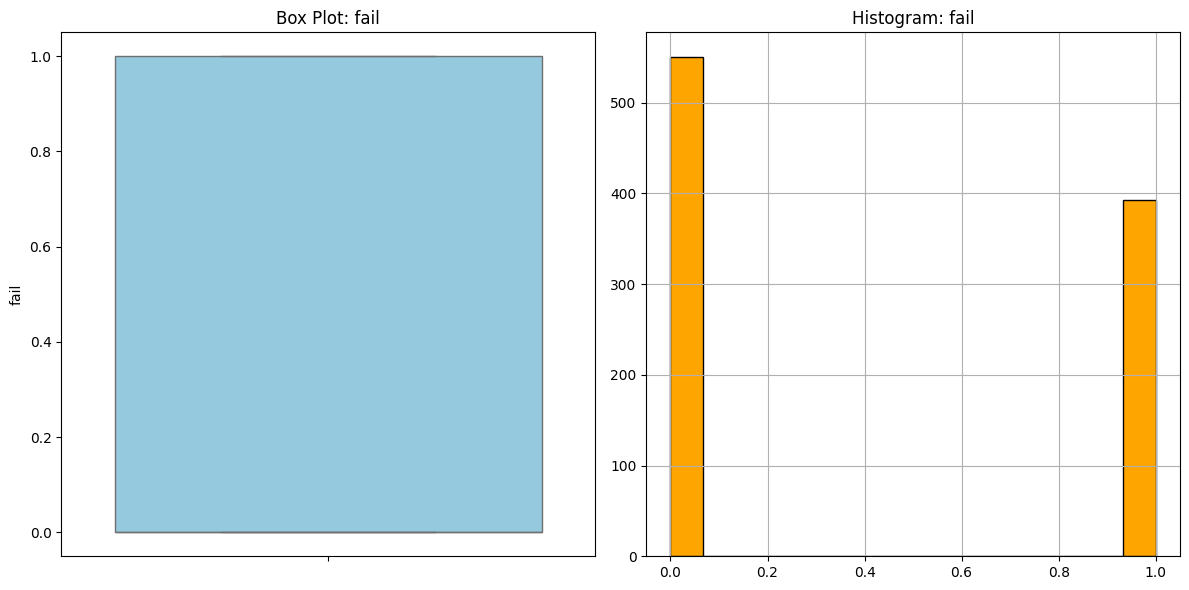

In [8]:
# Loop through columns t generate box plots and histograms for each column
for column in data.columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=data[column], color='skyblue')
    plt.title(f'Box Plot: {column}')

    plt.subplot(1, 2, 2)
    data[column].hist(bins=15, color='orange', edgecolor='black')
    plt.title(f'Histogram: {column}')
    plt.tight_layout()
    plt.show()

In [9]:
#Set limits for the 'footfall' column using quantiles to identify outliers
q1 = data['footfall'].quantile(0.25)
q3 = data['footfall'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f'Outlier limits for footfall: {lower_bound}, {upper_bound}')
data = data[(data['footfall'] >= lower_bound) & (data['footfall'] <= upper_bound)]

Outlier limits for footfall: -162.5, 273.5


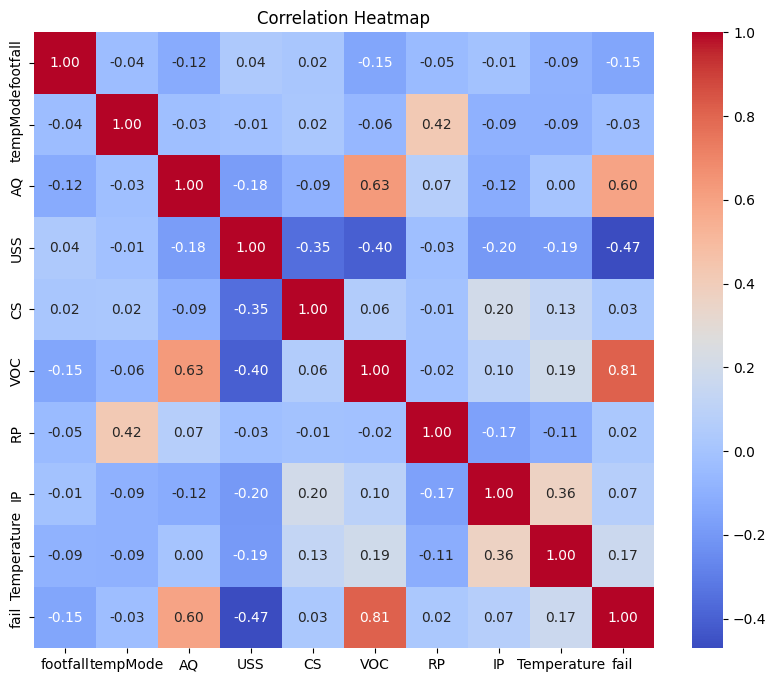

In [10]:
# Generate a heatmap to visualize correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [11]:
# Separate features and target variable
X = data.drop(columns=['fail'])
y = data['fail']

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Importing necessary Keras layers for building the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.activations import relu, tanh, sigmoid

What is Epoch?
Epoch refers to one complete pass through the entire training dataset.

In [15]:
# Display the shape of the dataset and initiate the Sequential Model
model1 = Sequential()

In [16]:
# Input layer
model1.add(Dense(9, kernel_initializer='he_uniform', activation='relu', kernel_regularizer=L2(0.03)))

# Hidden layers
model1.add(Dense(500, kernel_initializer='he_uniform', activation='relu', kernel_regularizer=L2(0.03)))
model1.add(Dense(100, kernel_initializer='random_normal', activation='relu', kernel_regularizer=L2(0.03)))

In [17]:
# Try with some other hidden layers on the model
model1.add(Dense(50, kernel_initializer='he_uniform', activation='tanh', kernel_regularizer=L2(0.03)))
model1.add(Dropout(0.3))

In [18]:
# Output layer
model1.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

In [19]:
# Compile the model with Optimizer and loss function
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
# Fit the model to the training data with validation on test data
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

train_accuracy = model1.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy = model1.evaluate(X_test, y_test, verbose=0)[1]
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.6720 - loss: 36.9459 - val_accuracy: 0.8165 - val_loss: 33.8400
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8383 - loss: 32.9053 - val_accuracy: 0.8291 - val_loss: 30.4173
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8810 - loss: 29.5764 - val_accuracy: 0.8671 - val_loss: 27.5038
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8781 - loss: 26.8132 - val_accuracy: 0.8608 - val_loss: 25.0420
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9152 - loss: 24.3953 - val_accuracy: 0.8734 - val_loss: 22.9073
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8859 - loss: 22.3575 - val_accuracy: 0.9051 - val_loss: 20.9928
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8979 - loss: 20.4907 - val_accuracy: 0.8797 - val_loss: 19.3076
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8976 - loss: 18.8637 - val_accuracy: 0.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │           5,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          50,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 180,875 (706.55 KB)

 Trainable params: 60,291 (235.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 120,584 (471.04 KB)

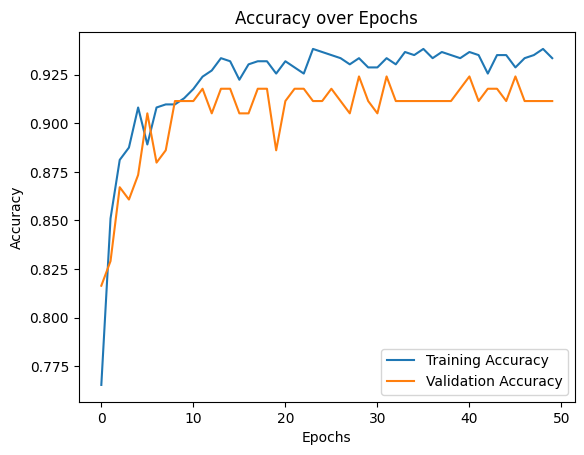

In [21]:
# Display the summary of the model architecture
model1.summary()
# Plot the accuracy and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

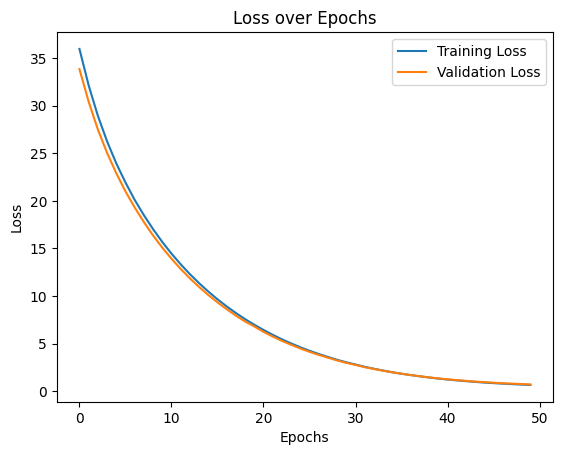

In [22]:
# Plot the loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()